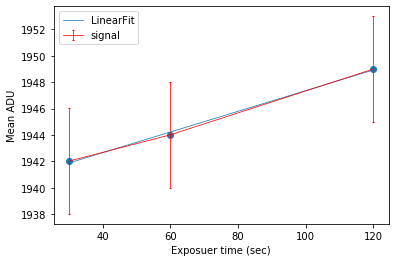

In [2]:
import numpy as np
from numpy.polynomial.polynomial import polyfit
import matplotlib.pyplot as plt
X=np.array([30, 60, 120])
Y= np.array([1942.02, 1944.01, 1948.99])
Yerr=4
plt.plot()
plt.scatter(X, Y)
b, m=polyfit(X, Y, 1)

plt.errorbar(X, Y, Yerr, label='signal', color='red', linewidth=0.75, capsize=1)
plt.plot(X, b+m*X, label='LinearFit', linewidth=0.75)
plt.xlabel('Exposuer time (sec)')
plt.ylabel('Mean ADU')
plt.legend(loc='upper left')
#plt.title('At 2 degree celcius')
plt.show()

In [3]:
fname="/Home/Desktp/lab"
data=np.generate(fname,dtype=,skip_row=)


plt.plot(data[],data[])

SyntaxError: invalid syntax (<ipython-input-3-249e4478a674>, line 2)

# Chenhuan's Version
Ok, i will just try to do this completely new and keep you work above. First of all, manually typing in the data is really really bad idea. One could for example, do

In [9]:
data = np.genfromtxt("imstats.dat", delimiter="\t").T
# for this to work, you should have the data file in the same directory!
print(data)

[[        nan         nan         nan         nan         nan         nan
          nan         nan         nan         nan         nan         nan
          nan         nan         nan         nan         nan         nan
          nan         nan         nan         nan         nan         nan
          nan         nan         nan         nan         nan         nan
          nan         nan         nan]
 [1.94150e+03 1.93764e+03 1.93921e+03 1.94150e+03 1.96487e+03 1.94093e+03
  1.94934e+03 1.94093e+03 1.95219e+03 1.94064e+03 1.94321e+03 1.93793e+03
  1.93800e+03 1.93893e+03 1.94000e+03 1.94007e+03 1.94550e+03 1.93824e+03
  1.93843e+03 1.93900e+03 1.94127e+03 1.94007e+03 1.95027e+03 1.93876e+03
  1.94007e+03 1.93937e+03 1.94350e+03 1.94043e+03 1.95667e+03 1.93950e+03
  1.94221e+03 1.94014e+03 1.94688e+03]
 [1.93600e+03 1.93200e+03 1.93300e+03 1.93600e+03 1.95800e+03 1.93500e+03
  1.94300e+03 1.93500e+03 1.94600e+03 1.93500e+03 1.93700e+03 1.93200e+03
  1.93200e+03 1.93300e+03 1.93400e

So here the order of rows are messy, sometimes things get mixed, not easy to work on. In other tasks, it is really useful! Please try doing this first! I am not sure if you want to use genfromtxt() here, if you do, tell me and I can show you how to do it.

## about data

Think about which one of mean, media and average to use and motivate the choise in the report. If you use average, you need to use the sigma column in the data as the uncertainties in curve fitting.

Data you have here is problematic. It seems wrong, pls check it again! You seem to be using imstats_all.dat, which is not correct. Read the header of the .dat files. We should use imstats.dat! And you are taking the -2 degree data! Careful with the minus sign  in the imstats.dat!

But I will continue using your data.

## curve_fit method

References and examples: https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html
Please read carefully!

In [7]:
from scipy.optimize import curve_fit
def line(x, a,b): 
    # model function
    return a*x + b

popt, pcov = curve_fit(line, X, Y)
print(popt, pcov)

[7.82380952e-02 1.93953000e+03] [[ 1.70068179e-05 -1.19047672e-03]
 [-1.19047672e-03  1.07142857e-01]]


So curve_fit gives you two arrays. First one contains the best fit parameters: a and b. And the second array is the covariance matrix. Most of times, here as well, one can just use the diagonal entries to give errors of parameters.

In [8]:
perr = np.sqrt(np.diag(pcov))
print("a =", popt[0], "+-", perr[0])
print("b =", popt[1], "+-", perr[1])

a = 0.07823809523608927 +- 0.004123932332488547
b = 1939.5300000042282 +- 0.3273268355610256


Then you just need to do this to all the temperatures and in the end do another curve fit of dark current against temp.